In [10]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('DC_data.csv')
df2 = pd.read_csv('DC_data_normal.csv')  
#Merge the two csv files to one
merged_df = pd.concat([df1, df2])   
df = merged_df
df

,AX,AY,AZ,GPS_Lat,GPS_Long,GX,GY,GZ
0,-0.117845,0.011585,-0.144077,33.836805,-84.311771,-0.200935,-0.086819,-0.090015
1,-0.828836,4.831081,8.623124,33.836805,-84.311771,-0.567130,4.400494,8.817757
2,0.101733,-0.005060,-0.135821,33.836805,-84.311771,0.832429,4.589138,8.571621
3,-0.426638,-0.679106,-0.366451,33.836805,-84.311771,-0.219186,0.176667,0.112587
4,0.792556,4.009252,-0.176701,33.836805,-84.311771,-20.466370,-10.375417,-2.564360
...,...,...,...,...,...,...,...,...
633,0.043143,-0.086686,-0.031558,33.755095,-84.387769,-0.215593,-2.378710,9.350751
634,0.047804,-0.097738,0.492684,33.755095,-84.387769,-0.443762,-2.336789,9.480705
635,-0.082691,-0.002929,-0.235823,33.755095,-84.387769,0.016768,3.289591,9.380095
636,-0.032757,0.064049,0.066978,33.755110,-84.387790,0.029943,2.900326,9.157914


In [11]:
# Define your thresholds
# Adjust these based on your data analysis
threshold_ax, threshold_ay, threshold_az = 0.0, 0.0, 0.0  # Accelerometer thresholds (around 2.0 g)
threshold_gx, threshold_gy, threshold_gz = 0.1, 0.1, 2.1  # Gyroscope thresholds (degrees per second)

# Function to determine if a fall occurred
def detect_fall(row):
    if (abs(row['AX']) < threshold_ax or
        abs(row['AY']) < threshold_ay or
        abs(row['AZ']) < threshold_az or
        abs(row['GX']) > threshold_gx or
        abs(row['GY']) > threshold_gy or
        abs(row['GZ']) > threshold_gz):
        return 1
    else:
        return 0

# Apply the function to each row
df['Fall_Detected'] = df.apply(detect_fall, axis=1)

# Save the labeled data to a new CSV file
labeled_file_path = 'labeled_data.csv'  # Update with your desired output file path
df.to_csv(labeled_file_path, index=False)

print("Data labeling completed and saved to", labeled_file_path)

Data labeling completed and saved to labeled_data.csv


In [12]:
df_labelleddate = pd.read_csv('labeled_data.csv')
df_labelleddate

,AX,AY,AZ,GPS_Lat,GPS_Long,GX,GY,GZ,Fall_Detected
0,-0.117845,0.011585,-0.144077,33.836805,-84.311771,-0.200935,-0.086819,-0.090015,1
1,-0.828836,4.831081,8.623124,33.836805,-84.311771,-0.567130,4.400494,8.817757,1
2,0.101733,-0.005060,-0.135821,33.836805,-84.311771,0.832429,4.589138,8.571621,1
3,-0.426638,-0.679106,-0.366451,33.836805,-84.311771,-0.219186,0.176667,0.112587,1
4,0.792556,4.009252,-0.176701,33.836805,-84.311771,-20.466370,-10.375417,-2.564360,1
...,...,...,...,...,...,...,...,...,...
1676,0.043143,-0.086686,-0.031558,33.755095,-84.387769,-0.215593,-2.378710,9.350751,1
1677,0.047804,-0.097738,0.492684,33.755095,-84.387769,-0.443762,-2.336789,9.480705,1
1678,-0.082691,-0.002929,-0.235823,33.755095,-84.387769,0.016768,3.289591,9.380095,1
1679,-0.032757,0.064049,0.066978,33.755110,-84.387790,0.029943,2.900326,9.157914,1


In [13]:
df_labelleddate['Fall_Detected'].value_counts()

Fall_Detected
1    1657
0      24
Name: count, dtype: int64

# EDA

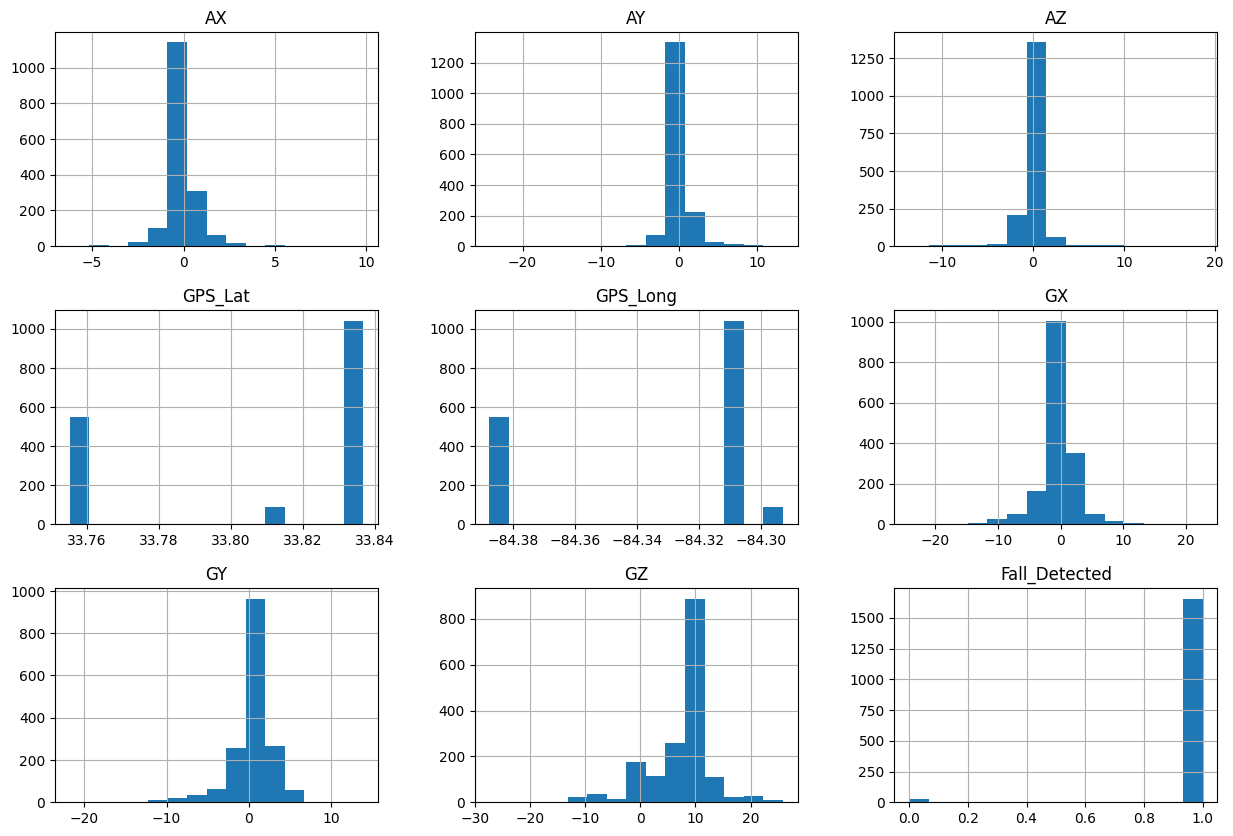

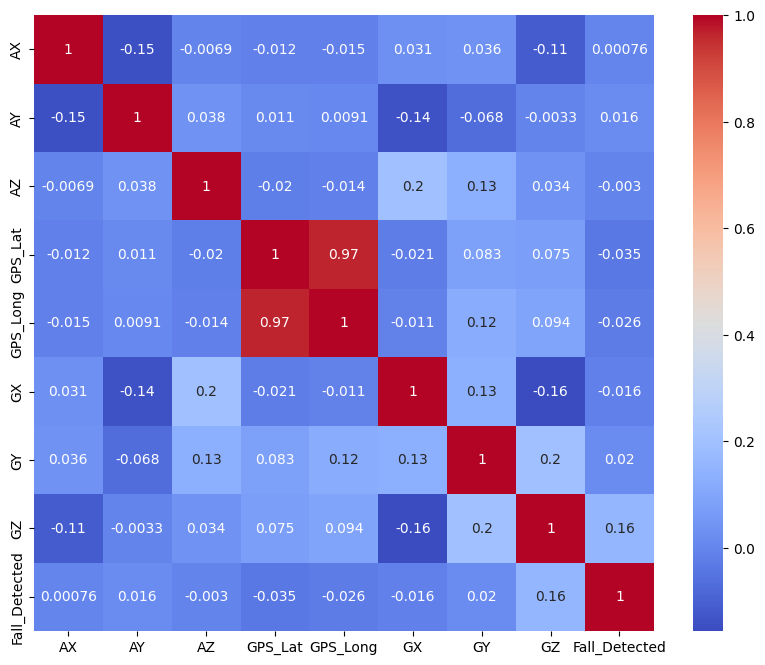

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of features
df_labelleddate.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_labelleddate.corr(), annot=True, cmap='coolwarm')
plt.show()


# Building Models

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
features = ['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ']
X = df_labelleddate[features]
y = df_labelleddate['Fall_Detected']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Class weights
# class_weights = {0: 1., 1: (467 / 576)}
# New class weights
class_weights = {0: 893/788, 1: 788/893}


# Random Forest

In [16]:
# Initialize the model with class weights
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

import joblib

# Save the Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')



Random Forest:
[[  0   4]
 [  0 501]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      1.00      1.00       501

    accuracy                           0.99       505
   macro avg       0.50      0.50      0.50       505
weighted avg       0.98      0.99      0.99       505



/Users/uthmanjinadu/Documents/iotproject/iotproject-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uthmanjinadu/Documents/iotproject/iotproject-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uthmanjinadu/Documents/iotproject/iotproject-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

['random_forest_model.pkl']

# Logistic Regression

In [17]:
# Initialize the Logistic Regression model with class weights
logreg_model = LogisticRegression(random_state=42, class_weight=class_weights)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Save the Logistics Regression Model
joblib.dump(logreg_model, 'logreg_model.pkl')


Logistic Regression:
[[  0   4]
 [  1 500]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      1.00      1.00       501

    accuracy                           0.99       505
   macro avg       0.50      0.50      0.50       505
weighted avg       0.98      0.99      0.99       505



['logreg_model.pkl']

# Support Vector Machine

In [18]:
# Support Vector Machine
# Initialize the Support Vector Classifier with class weights
svm_model = SVC(random_state=42, class_weight=class_weights)

# Hyperparameters to tune
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid search
svm_grid = GridSearchCV(svm_model, svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Best model
best_svm = svm_grid.best_estimator_

# Predict and evaluate
y_pred_svm = best_svm.predict(X_test)
print("Support Vector Machine:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Save the SVM Model
joblib.dump(best_svm, 'best_svm_model.pkl')


Support Vector Machine:
[[  0   4]
 [  0 501]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      1.00      1.00       501

    accuracy                           0.99       505
   macro avg       0.50      0.50      0.50       505
weighted avg       0.98      0.99      0.99       505



/Users/uthmanjinadu/Documents/iotproject/iotproject-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uthmanjinadu/Documents/iotproject/iotproject-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uthmanjinadu/Documents/iotproject/iotproject-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

['best_svm_model.pkl']

# Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Classifier with potential parameters to prevent overfitting
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameters to tune
gb_params = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'learning_rate': [0.01, 0.1],
    'max_depth': [3],  # Limiting depth of trees
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]  # Minimum samples required at a leaf node
}

# Grid search with cross-validation
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Best model
best_gb = gb_grid.best_estimator_

# Predict and evaluate on the test set
y_pred_gb = best_gb.predict(X_test)
print("Adjusted Gradient Boosting Classifier:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Save the Gradient Boosting Model
joblib.dump(best_gb, 'best_gb_model.pkl')


Adjusted Gradient Boosting Classifier:
[[  1   3]
 [  0 501]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.99      1.00      1.00       501

    accuracy                           0.99       505
   macro avg       1.00      0.62      0.70       505
weighted avg       0.99      0.99      0.99       505



['best_gb_model.pkl']

# Logistic Regression with SMOTE

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

# Feature scaling
scaler = StandardScaler()

# Oversampling using SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Pipeline for scaling and logistic regression
logreg_pipeline = make_pipeline(scaler, LogisticRegression(random_state=42, class_weight=class_weights))

# Hyperparameters to tune
logreg_params = {'logisticregression__C': [0.01, 0.1, 1, 10, 100], 
                'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Grid search
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=3, scoring='accuracy')
logreg_grid.fit(X_train_smote, y_train_smote)

# Best model
best_logreg = logreg_grid.best_estimator_

# Predict and evaluate
y_pred_logreg = best_logreg.predict(X_test)
print("Improved Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Save the Log Reg with Smote Boosting Model
joblib.dump(best_logreg, 'logreg_smote_model.pkl')


Improved Logistic Regression:
[[  4   0]
 [ 80 421]]
              precision    recall  f1-score   support

           0       0.05      1.00      0.09         4
           1       1.00      0.84      0.91       501

    accuracy                           0.84       505
   macro avg       0.52      0.92      0.50       505
weighted avg       0.99      0.84      0.91       505



['logreg_smote_model.pkl']